# Data manipulation

In [92]:
%pylab inline
figsize(8,8)

Populating the interactive namespace from numpy and matplotlib


## Classification with k-nearest neighbours

In this section of the workshop you will use a k-nearest neighbours classifier to first classify some two-dimensional data that can be easily plotted.  After that we'll try it on a more complicated dataset.

First download and plot some data

In [440]:
import wget

try: 
    X = loadtxt('raw-tremor.txt')
except IOError:
    wget.download('http://empslocal.ex.ac.uk/~reverson/ECM3420/raw-tremor.txt')
    X = loadtxt('raw-tremor.txt')
print(X.shape)

(357, 3)


In [441]:
t = X[:,2]               #Collects all values in column 2
X = X[:,:2]              #Collects all values in columns 0 and 1
print(t.shape, X.shape)

(357,) (357, 2)


Plot the data according to the labels

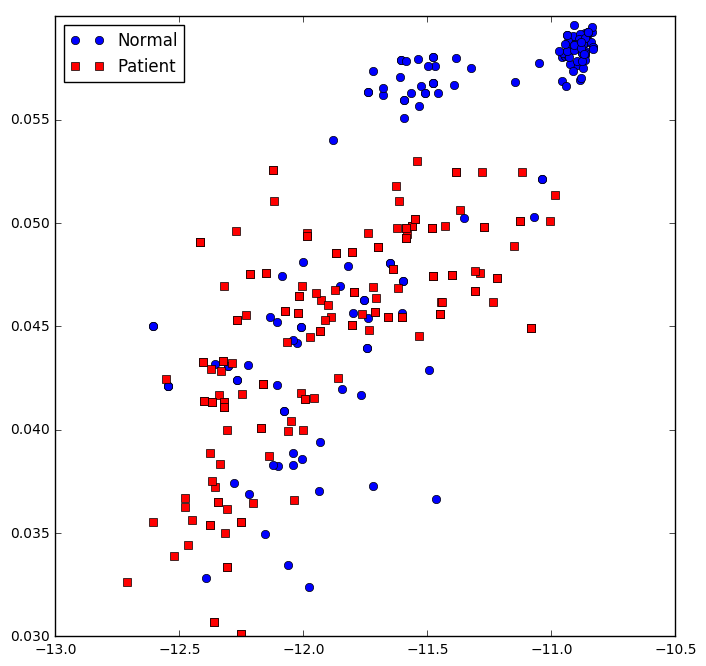

In [442]:
normal = t == 1
patient = t == 0
plot(X[normal,0], X[normal,1], 'bo', label='Normal')
plot(X[patient,0], X[patient,1], 'rs', label='Patient')
legend(loc=2)

Note the disparity in the scales of the two features.

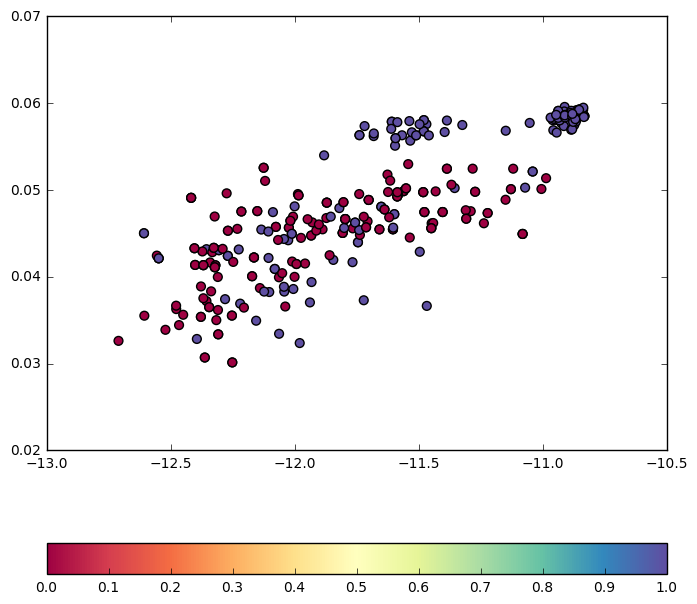

In [428]:
# An alternative way of plotting that colours the markers according to the value of t
scatter(X[:,0], X[:,1], s=40, c=t, cmap=cm.Spectral)
colorbar(orientation='horizontal')

### Mean and standard deviation

Find the mean (centroid) and standard deviation of the features as a whole and also for each of the classes. Check that the mean and standard
  deviation make sense in terms of your scatter plot.  You could plot the location of the centroid on the scatter plot.

##Centroids:
Global:  [-11.62216853   0.04892984] 			Manual Global:  [-11.622168530709247, 0.048929839090918734]
Normal:  [-11.346561543751685, 0.053230065654606744] 	Manual Normal:  [-11.346561543751683, 0.053230065654606737]
Patient:  [-11.896235813829048, 0.044653636139318435] 	Manual Patient:  [-11.896235813829049, 0.044653636139318463]
##Standard Deviations:
Global:  [ 0.5458699   0.00778218] 			Manual Global:  [0.54586990177238059, 0.0077821834786868235]
Normal:  [0.52683581094370902, 0.0075981663121763385] 	Manual Normal:  [0.52832195158552486, 0.0075981663121763394]
Patient:  [0.40738859578493097, 0.0051803837577436996] 	Manual Patient:  [0.40853134303887123, 0.0051803837577436996]


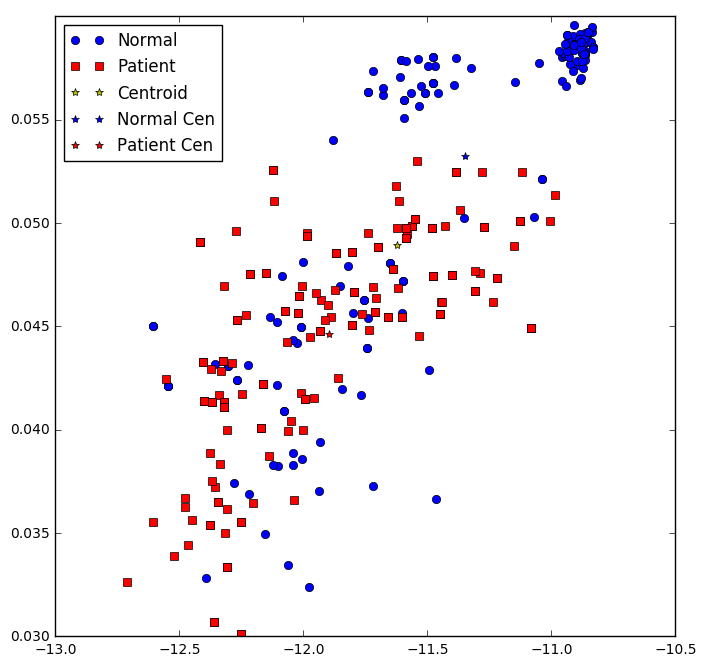

In [453]:
# Finding the centroids
cen = mean(X, axis=0)
normal_cen = [ mean(X[normal,0], axis=0), mean(X[normal,1], axis=0) ]
patient_cen = [ mean(X[patient,0], axis=0), mean(X[patient,1], axis=0) ]

# Finding the standard deviation
standard = std(X, axis=0, ddof=1)
normal_std = [ std(X[normal,0], axis=0), std(X[normal,1], axis=0, ddof=1) ]
patient_std = [ std(X[patient,0], axis=0), std(X[patient,1], axis=0, ddof=1) ]

# Manual Checks
# For ever value, sum the x and y independantly and sum for classes.
M_cen, M_normal_cen, M_patient_cen = [0,0], [0,0], [0,0]
for i in range( X.shape[0] ):
    M_cen[0] += X[i][0]
    M_cen[1] += X[i][1]
    if t[i] == 1:
        M_normal_cen[0] += X[i][0]
        M_normal_cen[1] += X[i][1]
    else:
        M_patient_cen[0] += X[i][0]
        M_patient_cen[1] += X[i][1]

# Divide the values by the sum of their data points
M_cen[0] = M_cen[0]/X.shape[0]
M_cen[1] = M_cen[1]/X.shape[0]
M_normal_cen[0] = M_normal_cen[0]/len( X[normal] )
M_normal_cen[1] = M_normal_cen[1]/len( X[normal])
M_patient_cen[0] = M_patient_cen[0]/len( X[patient] )
M_patient_cen[1] = M_patient_cen[1]/len( X[patient] )

# Beging Standard D Loop
M_standard, M_normal_std, M_patient_std = [0,0], [0,0], [0,0]
for i in range( X.shape[0] ):
    M_standard[0] += (X[i][0] - M_cen[0])**2
    M_standard[1] += (X[i][1] - M_cen[1])**2
    if t[i] == 1:
        M_normal_std[0] += (X[i][0] - M_normal_cen[0])**2
        M_normal_std[1] += (X[i][1] - M_normal_cen[1])**2
    else:
        M_patient_std[0] += (X[i][0] - M_patient_cen[0])**2
        M_patient_std[1] += (X[i][1] - M_patient_cen[1])**2

# Divide through by length - 1 as it is a sample.
# Currently Variance has been found, square root to get std
M_standard[0] = ((M_standard[0])/(X.shape[0]-1))**0.5
M_standard[1] = ((M_standard[1])/(X.shape[0]-1))**0.5
M_normal_std[0] = ((M_normal_std[0])/(len( X[normal] )-1))**0.5
M_normal_std[1] = ((M_normal_std[1])/(len( X[normal] )-1))**0.5
M_patient_std[0] = ((M_patient_std[0])/(len( X[patient] )-1))**0.5
M_patient_std[1] = ((M_patient_std[1])/(len( X[patient] )-1))**0.5

#Print values
print( '##Centroids:')
print( 'Global: ', cen, '\t\t\tManual Global: ', M_cen )
print( 'Normal: ', normal_cen, '\tManual Normal: ', M_normal_cen )
print( 'Patient: ', patient_cen, '\tManual Patient: ', M_patient_cen )
print('##Standard Deviations:')
print( 'Global: ', standard, '\t\t\tManual Global: ', M_standard)
print( 'Normal: ', normal_std, '\tManual Normal: ', M_normal_std)
print( 'Patient: ', patient_std, '\tManual Patient: ', M_patient_std)

#Plot points
plot(X[normal,0], X[normal,1], 'bo', label='Normal')
plot(X[patient,0], X[patient,1], 'rs', label='Patient')
plot( cen[0], cen[1], 'y*', label='Centroid')
plot( normal_cen[0], normal_cen[1], 'b*', label='Normal Cen')
plot( patient_cen[0], patient_cen[1], 'r*', label='Patient Cen')
legend(loc=2)

Make sure you understand the way the above works.  Print the values of the variables is you're not sure and use help etc to find out about plot and scatter.

### Covariance 

Use the Python command <code>cov</code> to return the covariance matrix (remember that the covariance matrix should be a 2 by 2 matrix for these data).  Check that the diagonal entries are what you expect from the standard deviations.

In [469]:
cov = np.cov(X.T)

print( 'Check for reassurance: ')
print( 'X Std**2:', standard[0]**2, '\tMatrix Cov00: ', cov[0][0], '\t\tAll close:', allclose(standard[0]**2,cov[0][0]))
print( 'Y Std**2:', standard[1]**2, '\tMatrix Cov11: ', cov[1][1], '\tAll close:', allclose(standard[1]**2,cov[1][1]))
print()
print('Covariance Matrix: ')
print( cov )

Check for reassurance: 
X Std**2: 0.297973949661 	Matrix Cov00:  0.297973949661 		All close: True
Y Std**2: 6.05623796959e-05 	Matrix Cov11:  6.05623796959e-05 	All close: True

Covariance Matrix: 
[[  2.97973950e-01   3.57549241e-03]
 [  3.57549241e-03   6.05623797e-05]]


Write a loop to calculate the covariance matrix by hand:
\begin{align*}
   S_{ij} = \frac{1}{N-1}\sum_{n=1}^N (x_{ni} - \bar{x}_{i})(x_{nj} - \bar{x}_{j})
\end{align*}
for each $i$ and $j$.

Check that you get the same result using both methods.

In [470]:
# Create Empty 2 by 2 array
cov = zeros((2,2))
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        # For each i and j of the covariance Matrix apply the algorithm.
        value = 0
        for row in range(X.shape[0]):
            value += ( X[row][i] - cen[i] )*( X[row][j] - cen[j] )
        cov[i][j] = value/(len(X)-1)    
print('Manual Covariance: ')
print(cov)


Manual Covariance: 
[[  2.97973950e-01   3.57549241e-03]
 [  3.57549241e-03   6.05623797e-05]]


Find the
correlation between the two variables $x_1$ and $x_2$ from the standardised
covariance matrix.  You can use  <code>corrcoef</code> to check your results, but you should be able to read it from the covariance matrix of the standardised data.

In [483]:
# Creating a new ndArray to populate with my standardises data
X_stdised = zeros((357,2), dtype=np.float64)

# Loop over each row and caculate data values for X and Y
for x in range(len(X)):
    X_stdised[x][0] = (X[x][0] - cen[0])/standard[0]
    X_stdised[x][1] = (X[x][1] - cen[1])/standard[1]
    
# Print the mean and covariance for checking
print( 'Mean: ', mean(X_stdised, axis=0) )
print()
print( 'Covariance: \n', np.cov(X_stdised.T))
print()

# Converting Covariance Matrix into Correlation
cor = zeros( (2,2) )
for i in range( cor.shape[0] ):
    cor[i][0] = cov[i][0]/(( cov[i][i] * cov[0][0])**0.5)
    cor[i][1] = cov[i][1]/(( cov[i][i] * cov[1][1])**0.5)
print( 'Manual Correlation: ')
print( cor )

# Printing corrcoef to checking
print()
print('Proof:')
print( np.corrcoef(X_stdised[:,0],X_stdised[:,1].T) )

Mean:  [  7.02799163e-15   4.26798341e-15]

Covariance: 
 [[ 1.          0.84167659]
 [ 0.84167659  1.        ]]

Manual Correlation: 
[[ 1.          0.84167659]
 [ 0.84167659  1.        ]]

Proof:
[[ 1.          0.84167659]
 [ 0.84167659  1.        ]]


## k-nearest neighbour classifier

Now we will use a k-nn classifier to classify the data.  You will have to divide the data into a training and a test set.  You can use the k-nn classifier from the <code>sklearn</code> module as follows.

In [484]:
# Divide the data into training and test sets
from numpy.random import permutation
N = X.shape[0]
I = permutation(N)   # Shuffled indices 0,..., N-1
Itr = I[:N//2]
Ite = I[N//2:]

Xtr = X[Itr,:]
ttr = t[Itr]

Xte = X[Ite,:]
tte = t[Ite]

# Make a copy of the features as you will need it later.
Xtr_copy = Xtr.copy()
Xte_copy = Xte.copy()

Plot your training and test sets to make sure that they look like a fair random division of the data.

The training data are to be used to construct the classifier. The test data, which should not be used at all during training, are used to evaluate how well the classifier works.

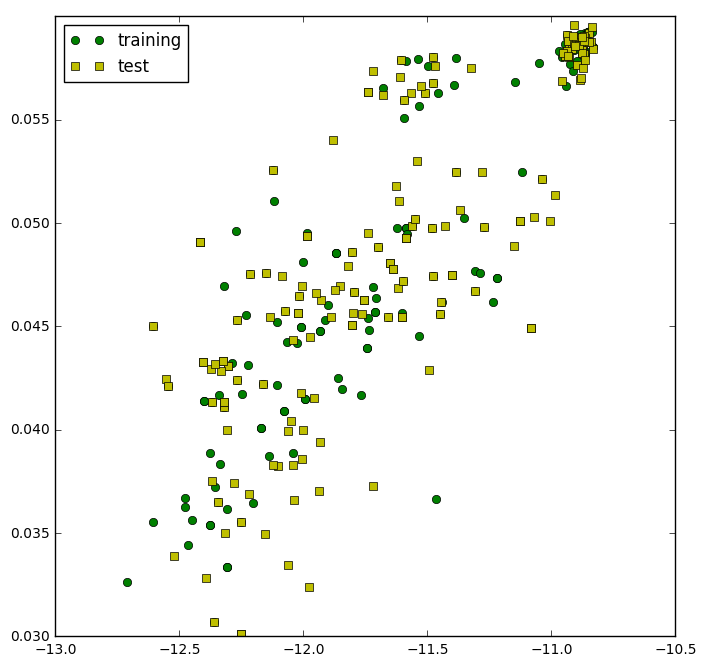

In [485]:
plot( Xtr[:,0], Xtr[:,1], 'go', label='training' )
plot( Xte[:,0], Xte[:,1], 'ys', label='test' )
legend(loc=2)

### Standardisation

Since the scales of the data are so different, it will be important to standardise the data before trying to classify it.


Find the mean and standard deviations of the *training* data and use these to standardise the training data.  (You can use the commands
<code>mean</code> and <code>std</code> to find the mean and standard deviation.) Use the training data mean and standard deviation to standardise the test data.  Note that it's important to use the training data statistics (rather than the test data statistics) because both data should be treated in *exactly* the same way and we might only have a single test data point to classify.

 
Plot the standardised data 
and check your result by finding its mean and covariance matrix. 


Training Mean:  [ -9.12300822e-15   1.40461924e-15]
Training Covariance:
 [[ 1.          0.86746276]
 [ 0.86746276  1.        ]]

Test Mean:  [ 0.01998619  0.01661713]
Test Covariance:
 [[ 0.95801784  0.79460765]
 [ 0.79460765  0.99126238]]


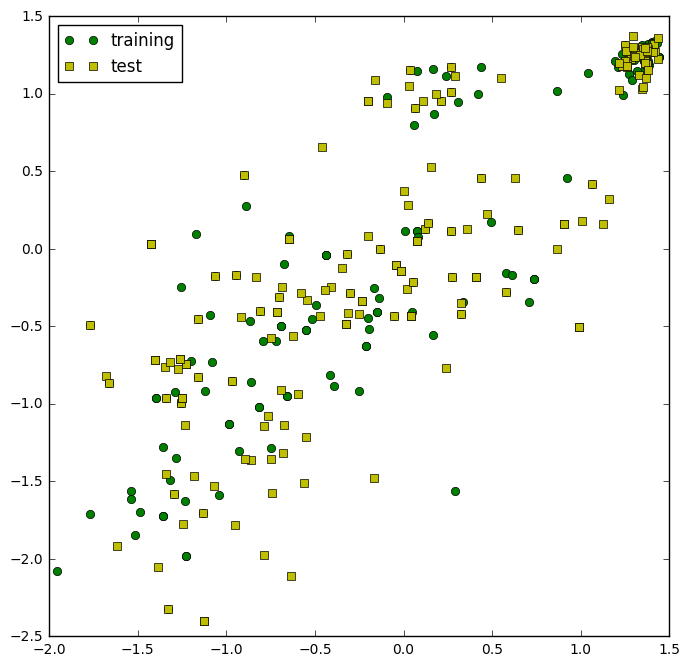

In [486]:
# Mean and standard deviations extracted
tr_mean = mean( Xtr, axis=0)
tr_std = std( Xtr, axis=0, ddof=1)

# Standardise the Training data
stdis_Xtr = zeros( Xtr.shape, dtype=np.float64)
for i in range(Xtr.shape[0]):
    stdis_Xtr[i][0] = ( Xtr[i][0] - tr_mean[0])/tr_std[0]
    stdis_Xtr[i][1] = ( Xtr[i][1] - tr_mean[1])/tr_std[1]
    
# Standardising the Test Data with training Data values
stdis_Xte = zeros( Xte.shape, dtype=np.float64)
for i in range(Xte.shape[0]):
    stdis_Xte[i][0] = ( Xte[i][0] - tr_mean[0])/tr_std[0]
    stdis_Xte[i][1] = ( Xte[i][1] - tr_mean[1])/tr_std[1]

# Comparing Mean and Covariance
print( 'Training Mean: ', mean( stdis_Xtr, axis=0) )    
print( 'Training Covariance:\n', np.cov( stdis_Xtr.T ))
print()
print( 'Test Mean: ', mean( stdis_Xte, axis=0))
print( 'Test Covariance:\n', np.cov( stdis_Xte.T ))

# Plot data
plot( stdis_Xtr[:,0], stdis_Xtr[:,1], 'go', label='training' )
plot( stdis_Xte[:,0], stdis_Xte[:,1], 'ys', label='test' )
legend(loc=2)

# Replace Original Data
Xtr = stdis_Xtr
Xte = stdis_Xte


We will use the k-nearest neighbour classifier from scikit learn, which is  quite an extensive implementation of various machine learning algorithms.

In [487]:
from sklearn.neighbors import KNeighborsClassifier

In general you can train the clasifier using <code>Xtr</code> and <Ttr> and then make a prediction of the classes of the features in <code>Xte</code> as follows:
<pre>
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtr, ttr)   # Train it

y = knn.predict(Xte)  # Predict the class of the testing data
</pre>

The next cell shows you how to classify points on a grid in feature space.  This is so that we can gain an understanding of how the classifier works for a whole range of points.  Note that this will give poor results unless you have first standardised your data.

(-3.0, 3.0, -3.0, 3.0)

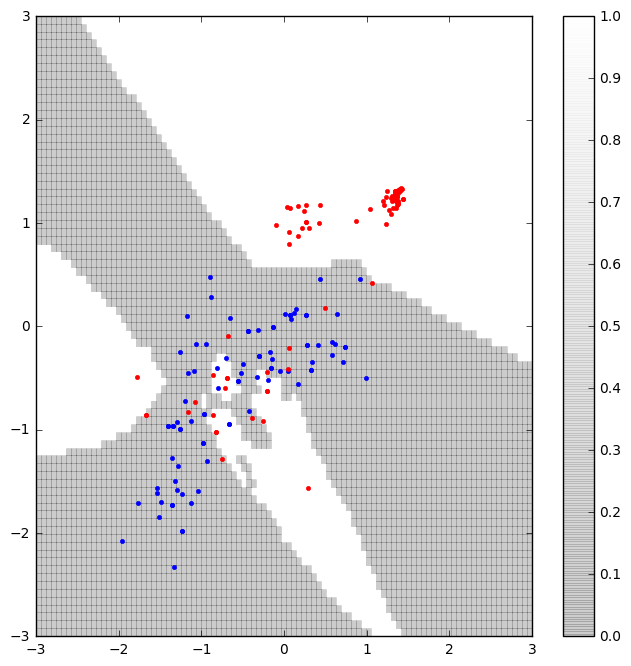

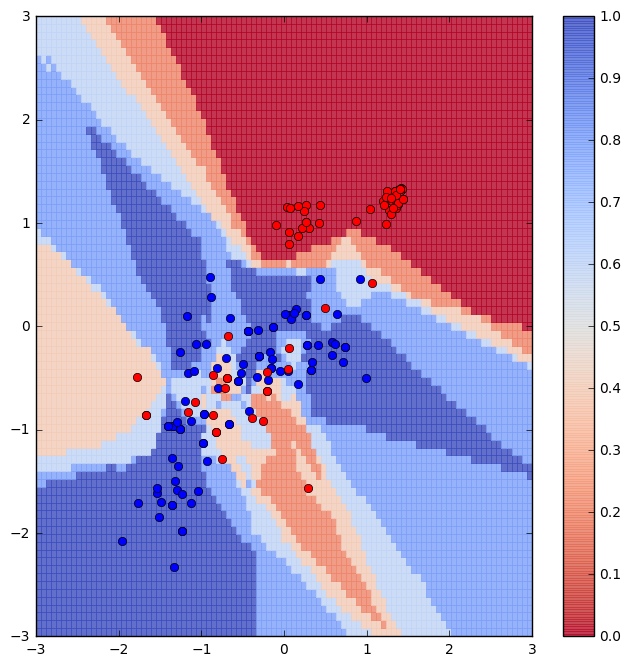

In [488]:
k = 5   # Chosse the number of nearest neighbours

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(Xtr, ttr)

# Plot the prediction by the classifier of the class probability 
# (estimated from the fraction of points of each class in the k
# nearest neighbours) for data on a grid.  

N, M = 100, 80   # Make these larger to get a smoother picture

Xgrid = linspace(-3.0, 3.0, N)
Ygrid = linspace(-3.0, 3.0, M)
pred = zeros((M,N))
prob = zeros((M,N,2))
# Writing this double loop is not very efficient, but it is clear.
for ny, y in enumerate(Ygrid):
    for nx, x in enumerate(Xgrid):
        pred[ny, nx] = knn.predict([[x, y]])          # Predict expects a matrix of features
        prob[ny, nx, :] = knn.predict_proba([[x, y]]) # Probabilities of belonging to one class
pcolor(Xgrid, Ygrid, pred, cmap=cm.gray, alpha=0.2)
colorbar()
plot(Xtr[ttr==0,0], Xtr[ttr==0,1], 'b.')
plot(Xtr[ttr==1,0], Xtr[ttr==1,1], 'r.')
axis('tight')

# Plot the class probabilites
figure()
pcolor(Xgrid, Ygrid, prob[:,:,0], cmap=cm.coolwarm_r, alpha=0.8)
colorbar()
plot(Xtr[ttr==0,0], Xtr[ttr==0,1], 'bo')
plot(Xtr[ttr==1,0], Xtr[ttr==1,1], 'ro')
axis('tight')


In [522]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtr, ttr)   # Train it

y = knn.predict(Xte)  # Predict the class of the testing data

Use your classifier to carry out $k=1$ classification of the
<code>Xte</code> tremor data. Following the example above,  plot the
training data according to its class and plot the test data according to
both its true class (from <code>tte</code>) and its predicted class from your
classifier.  Where the predicted class differs from the true class make
sure that you can see from the plot why the classifier has classified the
way it has. Work out the <i>classification accuracy</i> for your
classifier, that is the fraction of examples in <code>Xte</code> for which  the
classifier predicts the correct class.

Repeat the above for  $k = 3$ and $k = 10$ and give an explanation for
your results.   Automate the procedure to plot a graph of the
classification accuracy of <code>Xte</code> versus $k$ for $k$ up to about 40.  What's the best $k$ to use?  Why are smaller $k$ worse?  Why are larger $k$ worse?

Now plot the classification accuracy for the <i>training </i> data (that
is call your classifier like <code>knn.predict(Xtr)</code>).
Explain the shape of the curve.

In [529]:
def knnAutomation( k, Xtr, ttr, Xte, tte, pplot='True' ):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtr, ttr)
    
    test_predict = knn.predict( Xte )
    
    # Prediction accuracy
    acc_count = 0
    for i in range( test_predict.shape[0] ):
        if tte[i] == test_predict[i]:
            acc_count += 1
    acc_count = (acc_count/tte.shape[0])*100
    

    # Plot the prediction by the classifier of the class probability 
    # (estimated from the fraction of points of each class in the k
    # nearest neighbours) for data on a grid.  
    if pplot == 'True':
        N, M = 80, 50   # Make these larger to get a smoother picture

        Xgrid = linspace(min( Xtr[:,0]), max( Xtr[:,0]), N)
        Ygrid = linspace(min( Xtr[:,1]), max( Xtr[:,1]), M)
        pred = zeros((M,N))
        # Writing this double loop is not very efficient, but it is clear.
        for ny, y in enumerate(Ygrid):
            for nx, x in enumerate(Xgrid):
                pred[ny, nx] = knn.predict([[x, y]])          # Predict expects a matrix of features
                
        print( 'Testing accuracy: ', acc_count, '%' )
        # Plot the training data
        pcolor(Xgrid, Ygrid, pred, cmap=cm.gray, alpha=0.2)
        colorbar()
        plot(Xtr[ttr==0,0], Xtr[ttr==0,1], 'b.', label='Normal')
        plot(Xtr[ttr==1,0], Xtr[ttr==1,1], 'r.', label='Patient')
        axis('tight')
        legend(loc=2)

        # Plot the testing data
        figure()
        pcolor(Xgrid, Ygrid, pred, cmap=cm.gray, alpha=0.2)
        colorbar()
        plot(Xte[tte==0,0], Xte[tte==0,1], 'ys' , label='True Normal')
        plot(Xte[tte==1,0], Xte[tte==1,1], 'gs', label='True Patient')
        plot(Xte[test_predict==0,0], Xte[test_predict==0,1], 'y.', label='Predicted Normal')
        plot(Xte[test_predict==1,0], Xte[test_predict==1,1], 'g.', label='Predicted Patient')
        axis('tight')
        legend(loc=2)
    else:    
        return acc_count

Testing accuracy:  79.88826815642457 %


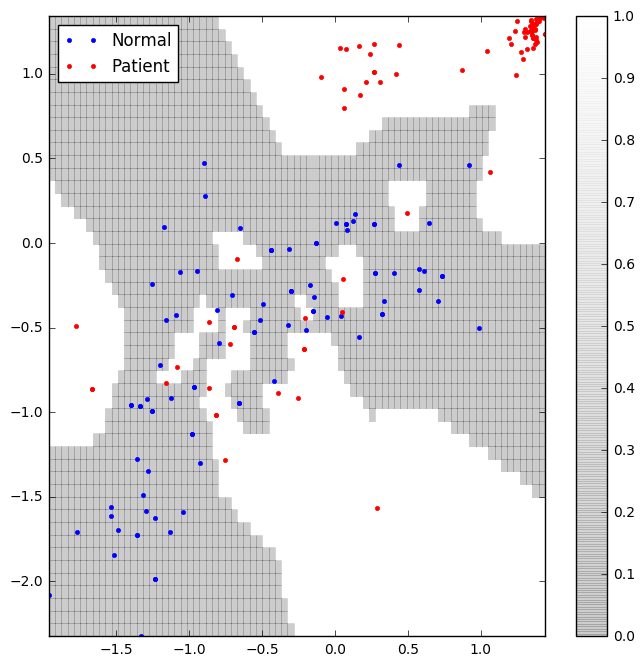

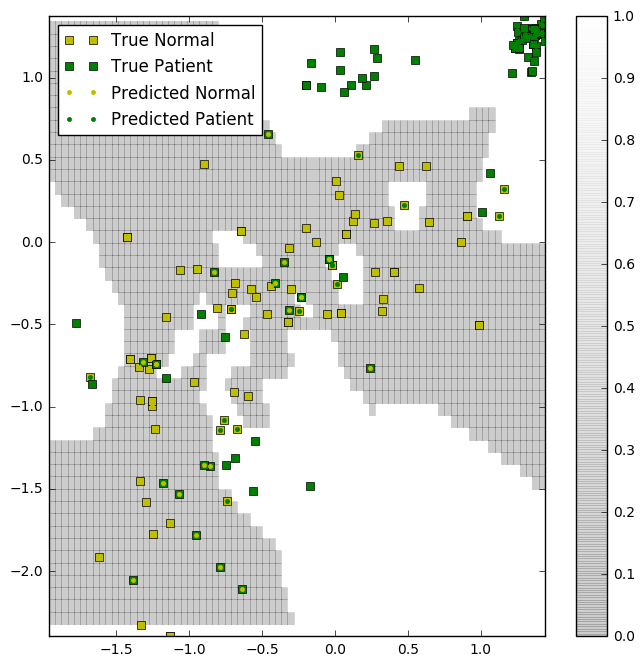

In [530]:
knnAutomation( 1, Xtr, ttr, Xte, tte )

Testing accuracy:  80.44692737430168 %


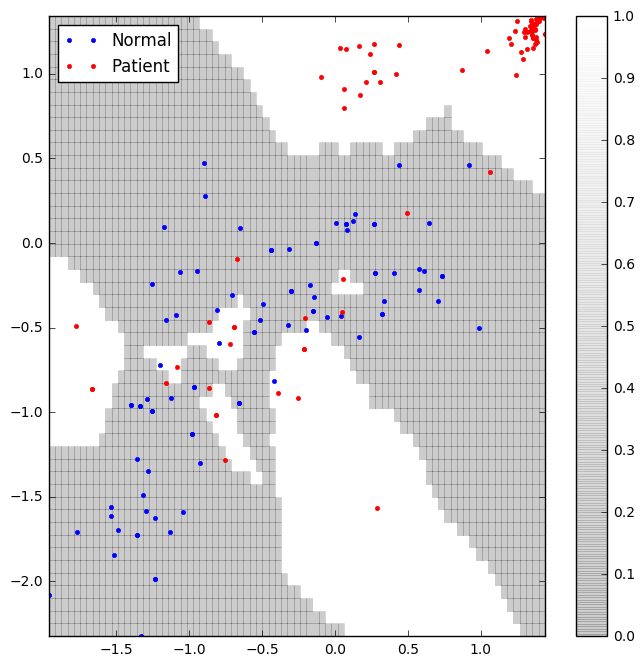

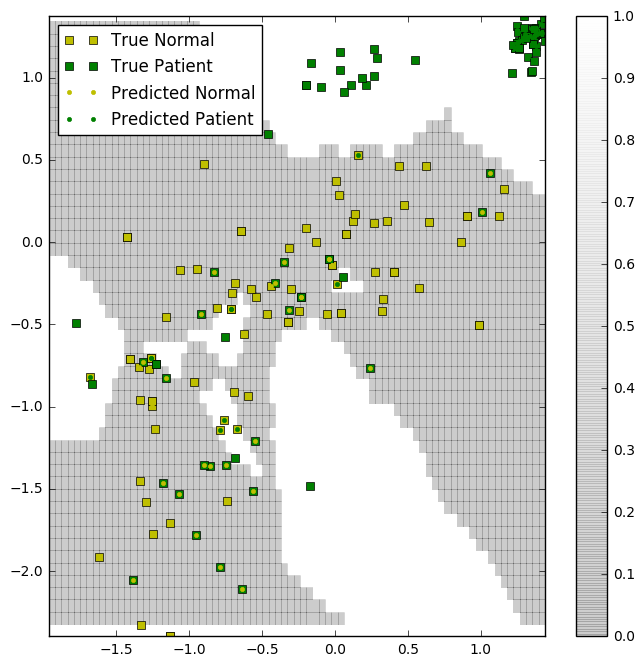

In [531]:
knnAutomation( 3, Xtr, ttr, Xte, tte )

Testing accuracy:  81.00558659217877 %


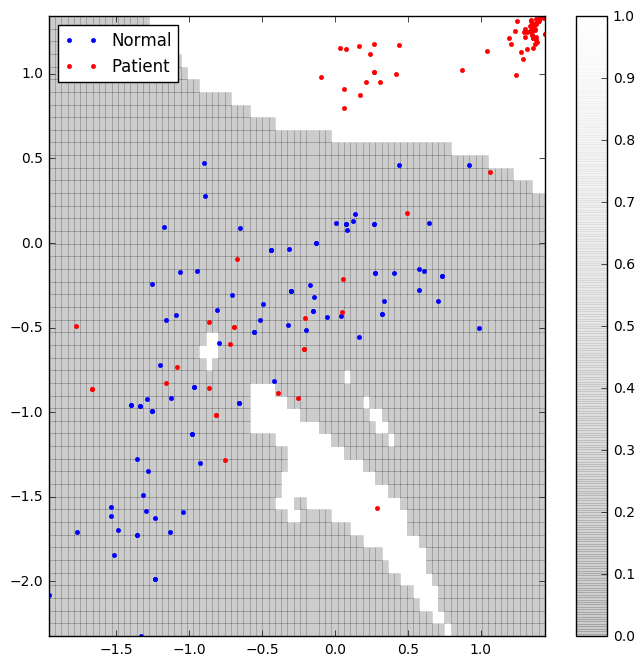

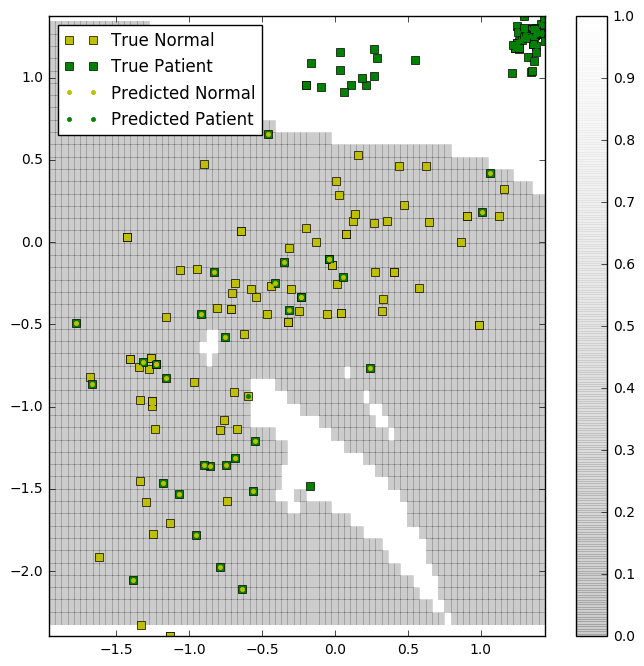

In [532]:
knnAutomation( 10, Xtr, ttr, Xte, tte )

** Comment on the results of the k = 1, 3, 10 accuracys **

    The values vary wildly based on the initial permutation of the training and test sets.
    I don't want to make an comparisons definitively between any permutations, However it seems
    that all perform commendably scoring around 76% - 84% reguarly.

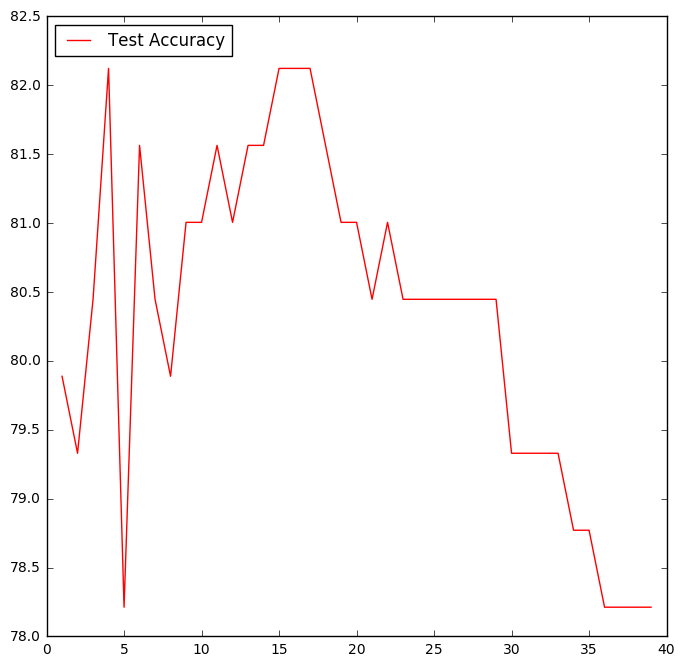

In [533]:
# Accuracy Scores plotted for unstandardised
acc_scores = []
for k in range( 1, 40 ):
    acc_scores.append( knnAutomation( k, Xtr, ttr, Xte, tte, 'False' ))
plot( range(1,40), acc_scores, 'r', label='Test Accuracy')
legend(loc=2)

### Question Answers
**What is the best value of K to use?**

    From the results produced, it would seem that the appropiate K would be around 3, giving an accuracy of 
    around 85%. However these values can range wildly depending on the training data set and I have seen 
    situations where K = 1 or K = 3 have been a better selection. 
    
**Why is lower values of K better or worse?**

    Due to the nature of the data (having very interwoven data points and having a small data set), Using small
    values of K could lead to over-fitting of the training data. Additionally there is less resilience to errors
    in the training set data points.
    
**Why is higher values of K better or worse?**

    Larger values have the opposite effect of underfitting the training data and loosing accuracy. For example
    when the value of K approaches N, data points are more likely to be predicted to be apart of the larger class rather than
    mimic the underlying causes. For our data it is easy to see that the interwoven data is misclassified which
    is reason for the decreasing trend
    

Now use the k-nn classifier to find the accuracy using the standardised data.  How does it compare with the raw data?

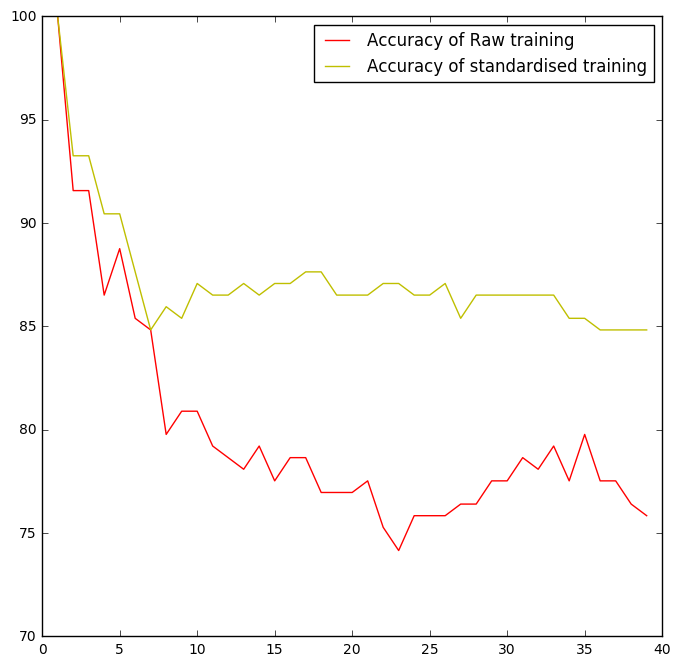

In [536]:
# Accuracy Scores plotted for unstandardised
acc = []
acc_std = []
for k in range( 1, 40 ):
    acc.append( knnAutomation( k, Xtr_copy, ttr, Xtr_copy, ttr, 'False' ))
    acc_std.append( knnAutomation( k, Xtr, ttr, Xtr, ttr, 'False' ))
    
plot( range(1,40), acc, 'r', label='Accuracy of Raw training')
plot( range(1,40), acc_std, 'y', label='Accuracy of standardised training')
legend(loc=1)


**How does the accuracy of the raw Data compare to the Standardised Data?**

    For the training data the accuracy falls off as K is increased. This is expected as the knn classifier becomes
    less and less over fitted to the data. The Standardised Data consistantly yields less Errors as K is increased.

### Cross validation

Above we used all the training data and guessed the value of $k$. Much better is to estimate the optimum value of $k$, but dividing the training data into a training and a validation set; the generalisation error is then estimated on the validation set and the $k$ giving the minimum error is used for making predictions about unknown data.

Better than just dividing the training data into two is to use $k$ fold cross validation (don't confuse the $k$ in $k$ cross validation with the $k$ in $k$ nearest neighbours!

To perform $k$-fold cross validation divide the training data into several (Nfold) portions/folds, use all but one of them to train the classifier, and evaluate the accuracy on the fold that you have reserved.  Do this for each fold in turn and average the error on the reserved folds to find an overall *validation error*, which is an estimate of the *generalisation error*.   Usually dividing the data into 5 or 10 folds will be enough. 


You can either write your own code to do this or use the cross validation machinery provided by scikit learn. The following cell shows how the sklearn routines may be used to produce training and validation sets automatically. More information at <http://scikit-learn.org/stable/modules/cross_validation.html>.    You will need to adapt it for your data. 

You will probably get a warning that this is deprecated, but don't worry about it!

In [538]:
def kfolder( X, t, pplot='True' ):
    cv = KFold(len(t), n_folds=5, shuffle=True)
    error_training = []
    error_validation = []

    for knn_k in range(1,51):

        acc_training, acc_validation = 0, 0
        for train, validation in cv:
            # Predict the training data and the test data against the classifier
            knn = KNeighborsClassifier(n_neighbors=knn_k)
            knn.fit(X[train], t[train])
            tr = knn.predict(X[train])
            val = knn.predict(X[validation])

            # For every value that is predicted correctly: Count it
            acc_tr = 0
            for i in range( len(t[train]) ):
                if tr[i] == t[train][i]:
                    acc_tr += 1

            acc_val = 0
            for i in range( len(t[validation])):
                if val[i] == t[validation][i]:
                    acc_val += 1

            # Add the accuracy of this particular fold to the level accuracy
            acc_training += (acc_tr/len(t[train]))
            acc_validation += (acc_val/len(t[validation]))

        # Record for the value of K, the accuracy of the training and test sets
        error_training.append( 100 - (acc_training/5)*100 )
        error_validation.append( 100 - (acc_validation/5)*100 )
        
    if pplot == 'True':
        # Plot the training and test errors
        plot( range(1,51), error_training, 'g', label='Training Error')
        plot( range(1,51), error_validation, 'y', label='Validation Error')
        legend(loc=4)
        
    else:
        return (error_validation.index( min(error_validation) ), min( error_validation ))


Make a plot of the training and validation errors as $k$ varies from 1 to, say, 50.  

*  What is the best value of $k$?  
*  What is the error on the **test** set with the best $k$?
*  Make a plot of the decision regions (as above) with the best $k$
*  What can you say about the performance of the classifier when $k$ is too large or too small?
*  How do you think the optimum $k$ will vary if the amount of training data available is larger or smaller?  Can you test your hypothesis?

Best value of K:  0  With an error value of:  13.724569640062583 %


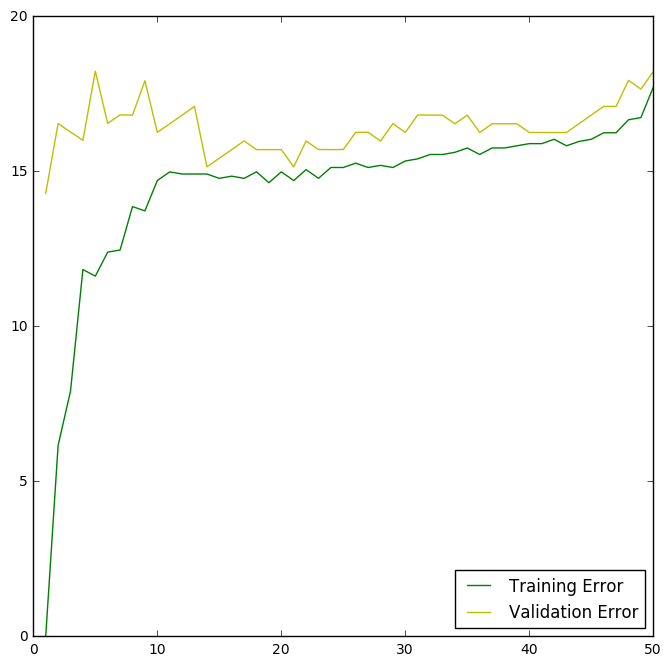

In [541]:
kfolder( X_stdised, t )
k, prob = kfolder( X_stdised, t, 'False' )
print('Best value of K: ', k, ' With an error value of: ', prob,'%')

** What can be said when K is too large or too small ** 

    Accuracy is lost in both the Training and Validation sets, underfitting is occuring. When K is too small,
    over fitting is occuring but due to the interwoven nature of the data this seems benificial is most cases
    with small values of K often being the optimum.

** How will it vary with more data? **

    With more data points the value of optimum value for K will increase as overfitting will cause a larger
    validation error at the smaller values for K. The graph will seem to shift right with a droop in the middle
    as the error decreases and then increases again.


### Unstandardised data

Compare the performance of the classifier on the unstandardised data.  Why are they different?  

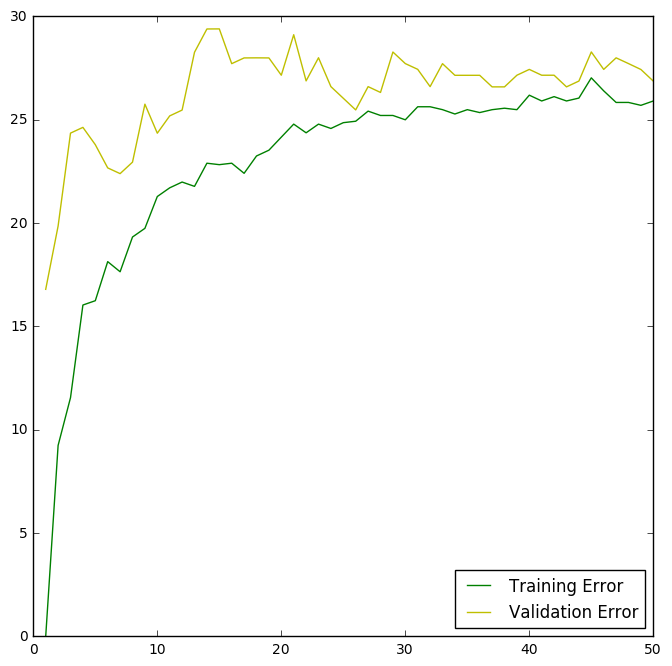

In [542]:
kfolder( X, t )

** Why is the Unstandardised data different? ** 

    The larger scales mean that greater variations can happen, the speed at which larger K resolve 
    over fitting and under fitting is slower.

### Sphering

Sphere  the tremor data and plot it in the sphered coordinates. Compute the mean and covariance matrix of the sphered data: are they what you expect?


Mean:
[  7.48467581e-15   9.26274308e-16]

Covariance:
[[  1.00000000e+00  -5.78111217e-17]
 [ -5.78111217e-17   1.00000000e+00]]


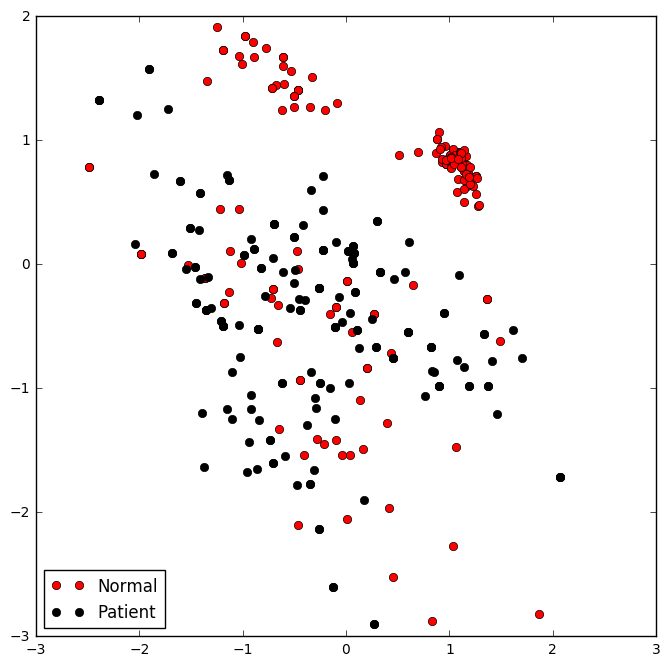

In [543]:
sphere_mean = mean(X_stdised, axis=0)
Y = X_stdised - sphere_mean

sphere_covariance = np.cov(Y.T)

ld, U = eigh(sphere_covariance)
ld [ ld < 0 ] = 0

X_sp = X_stdised @ (U @ diag(1/sqrt(ld)) @ U.T)


# Printing the mean and covariance of the Sphered data
print( 'Mean:' )
print( mean(X_sp, axis=0) )
print()
print( 'Covariance:' )
print( np.cov( X_sp.T) )

plot(X_sp[normal, 0], X_sp[normal, 1], 'ro', label='Normal')
plot(X_sp[patient, 0], X_sp[patient, 1], 'ko', label='Patient')
legend(loc=3)

** Are the mean and Covariance what I expect? **

    Yes as the data is centred 0 via standardisation and therefore the mean should be zero, and the
    correlation of the variables should be zero as the process of sphering removes such dependancies.

Find the classification accuracy using the sphered data.

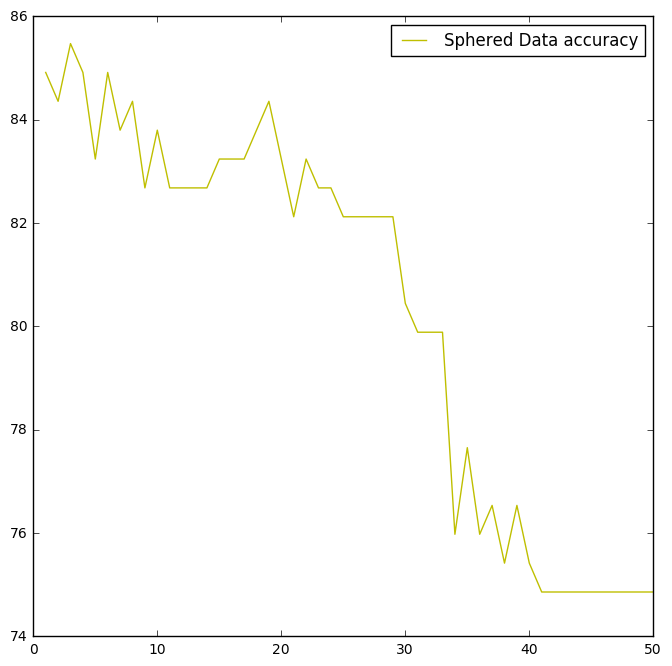

In [545]:
I = permutation( X_sp.shape[0] )
training = I[:X_sp.shape[0]//2]
testing = I[X_sp.shape[0]//2:]

Xtr_sp = X_sp[training,:]
ttr_sp = t[training]

Xte_sp = X_sp[testing,:]
tte_sp = t[testing]

acc_sphered = []
for k in range( 1, 51):
    acc_sphered.append( knnAutomation( k, Xtr_sp, ttr_sp, Xte_sp, tte_sp, 'False' ) )
    
plot( range(1, 51), acc_sphered, 'y', label='Sphered Data accuracy')
legend(loc=1)


## Classifying digits

Here you'll use the k-nn classifier to distinguish between digits. You can load and plot a dataset of digit images as follows (keep executing the cell to see more digits)

(1797, 64)


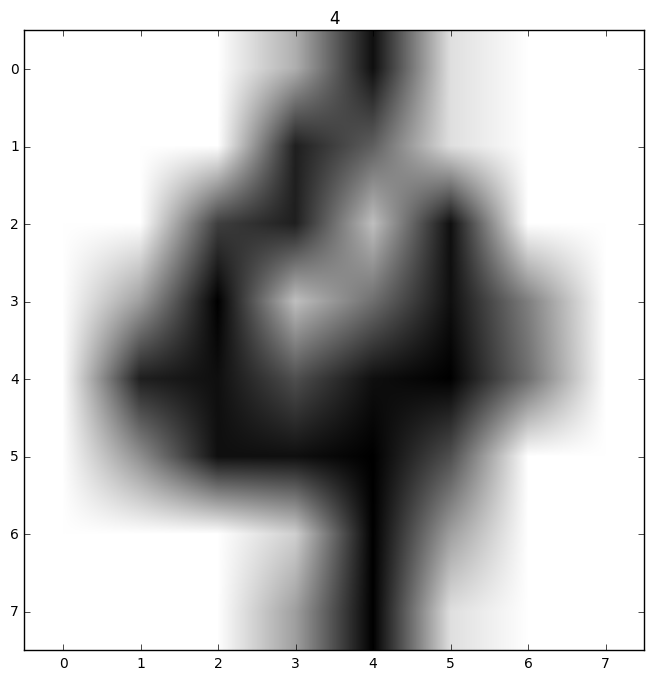

In [546]:
import sklearn.datasets
from numpy.random import randint
digits = sklearn.datasets.load_digits(n_class=10)
print(digits.data.shape)

# Pick a digit at random and plot it.  
# The title should be the number that is the digit from the target arrage
j = randint(digits.data.shape[0])
imshow(reshape(digits.data[j], (8,8)), cmap=cm.gray_r)
title("%d" % digits.target[j])

As you can see there are 1797 images arranged as 64-dimensional vectors. Choose two digits as the two classes that you'll use as the two classes and arrange them as a data and target matrix as follows.

In [547]:
mydigits = [2, 3]  # Choose your own!
I = np.logical_or(digits.target == mydigits[0], digits.target == mydigits[1])
X = digits.data[I,:]   # Features
# Make the targets 0 or 1 coresponding to the two classes
tmp = digits.target[I]
t = zeros(X.shape[0])
for i in (0,1):
    t[tmp == mydigits[i]] = i

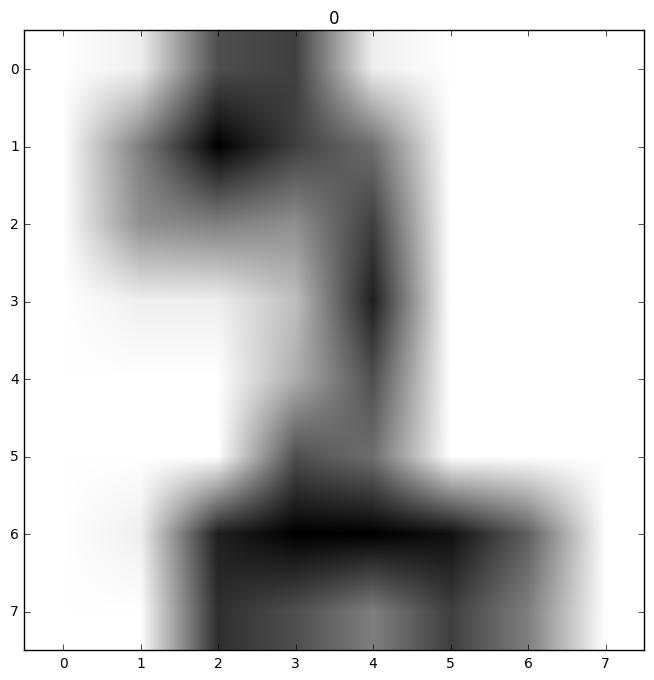

In [548]:
# Check the above: the title is now the class label, 0 or 1. 
# Re-execute to check that digits are labelled consistently
j = randint(len(t))
imshow(reshape(X[j], (8,8)), cmap=cm.gray_r)
title("%d" % t[j])

### k-nn classification

Now use your k-nn classifier to classify the image vectors.  What is the accuracy?   Note that here you should (a) split your data into training and testing data and (b) use cross validation on the training data to determine the best value of $k$ before finding the accuracy on the test data.  One reasonable way of proceeding would be to split the data into equal-sized training and test sets and then use 5 or 10 fold cross validation on the training set to determine $k$.

Do the misclassified images look like the other class?

In [549]:
# Split data into training and test data groups
I = permutation( X.shape[0] )
training = I[:X.shape[0]//2]
testing = I[X.shape[0]//2:]

Xtr = X[training,:]
ttr = t[training]

Xte = X[testing,:]
tte = t[testing]

# Mean and standard deviations extracted
tr_mean = mean( Xtr, axis=0)
tr_std = std( Xtr, axis=0, ddof=1)

# Standardise the Training data
stdis_Xtr = zeros( Xtr.shape, dtype=np.float64)
for i in range(Xtr.shape[0]):
    for j in range( Xtr.shape[1] ):
        if tr_std[j] == 0: continue # Causes problems if not here...
        stdis_Xtr[i][j] = ( Xtr[i][j] - tr_mean[j])/tr_std[j]
    
# Standardising the Test Data with training Data values
stdis_Xte = zeros( Xte.shape, dtype=np.float64)
for i in range(Xte.shape[0]):
    for j in range( Xtr.shape[1] ):
        if tr_std[j] == 0: continue # Causes problems if not here...
        stdis_Xte[i][j] = ( Xte[i][j] - tr_mean[j])/tr_std[j]
    
# Replace Data
Xtr = stdis_Xtr
Xte = stdis_Xte

Cross validation has selected a K of  2  with an error rate of  0.0 %
On test data  99.44444444444444 % of images were mapped correctly.


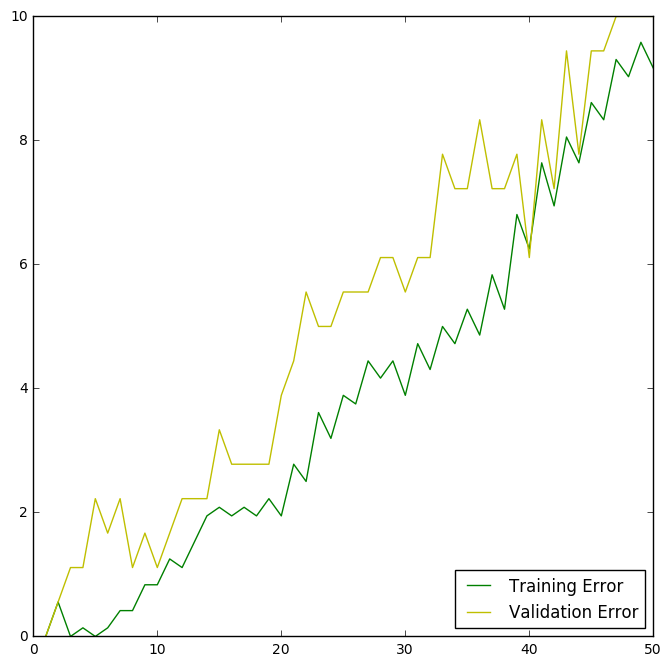

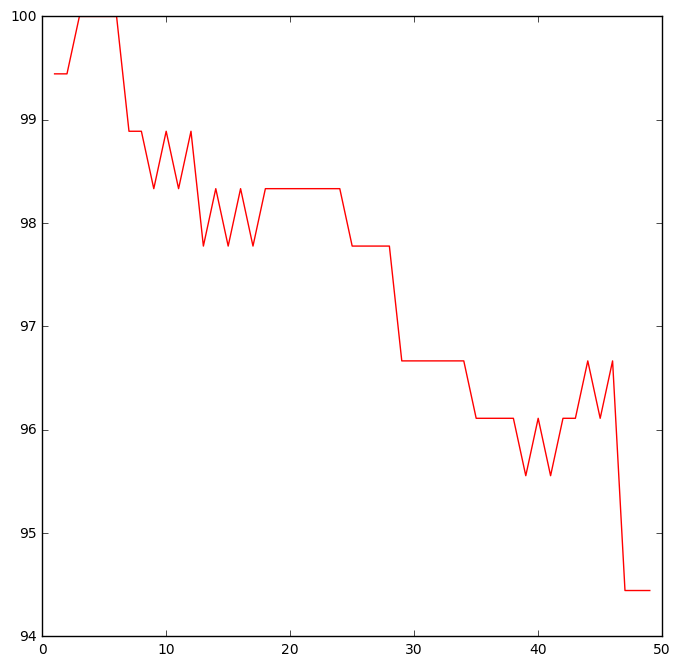

In [550]:
# Estimating using Cross and printing results:

k, error_rate = kfolder( Xtr, ttr, 'False')
print( 'Cross validation has selected a K of ', k, ' with an error rate of ', error_rate, '%' )

result = knnAutomation( k, Xtr, ttr, Xte, tte, 'False')
print( 'On test data ', result, '% of images were mapped correctly.')


# For general checking and validation.
# Run cross validation on the training data to get an aproximation.
kfolder( Xtr, ttr, ) # All errors for k between 1 - 50 are below 10% (when examining 2 and 3 as classes)
                     # Typically values for K between 1 - 10 provide least error.

acc_img = []
for i in range( 1, 50 ):
    acc_img.append(knnAutomation( i, Xtr, ttr, Xte, tte, 'False'))
figure()
plot( range( 1, 50), acc_img, 'r')